In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# train data
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
# test data
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [4]:
# train target data 파악
train_target[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

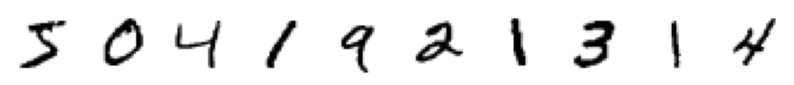

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [7]:
# train target의 종류 및 개수 파악
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


### 인공신경망

In [9]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)

In [10]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [11]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, activation='softmax', input_shape=(28*28,)))

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-28 14:35:04.257508: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-28 14:35:04.257730: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [14]:
model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2813 - accuracy: 0.9333
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2805 - accuracy: 0.9338
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2811 - accuracy: 0.9343
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2814 - accuracy: 0.9339
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2819 - accuracy: 0.9340
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2825 - accuracy: 0.9340
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2827 - accuracy: 0.9340
Epoch 8/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2830 - accuracy: 0.9342
Epoch 9/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2826 - accuracy: 0.9342
Epoch 10/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.282